In [6]:
from google.colab import drive
import matplotlib.pyplot as plt


### Instalando Panda

In [7]:
import pandas as pd
DATAFRAME_URL = "/content/drive/MyDrive/leitura/2007_2020_Manaus.csv"

In [8]:
df_manaus = pd.read_csv(DATAFRAME_URL,sep=';', low_memory=False)

In [9]:
df_manaus.tail()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
1340,2020-12-07,segunda,174,967.0,Falta de Atenção à Condução,Capotamento,pleno dia,chuva,0,0,1
1341,2020-12-08,terça,174,941.2,Defeito na Via,Tombamento,anoitecer,nublado,0,0,1
1342,2020-12-09,quarta,174,899.0,Falta de Atenção à Condução,Colisão transversal,pleno dia,chuva,1,1,0
1343,2020-12-21,segunda,174,947.0,Falta de Atenção à Condução,Saída de leito carroçável,plena noite,ceu claro,0,2,0
1344,2020-12-23,quarta,174,921.0,Defeito na Via,Saída de leito carroçável,pleno dia,nublado,0,0,0


In [10]:
df_manaus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_inversa            1345 non-null   object 
 1   dia_semana              1345 non-null   object 
 2   br                      1345 non-null   int64  
 3   km                      1345 non-null   float64
 4   causa_acidente          1345 non-null   object 
 5   tipo_acidente           1345 non-null   object 
 6   fase_dia                1345 non-null   object 
 7   condicao_metereologica  1345 non-null   object 
 8   mortos                  1345 non-null   int64  
 9   ilesos                  1345 non-null   int64  
 10  feridos                 1345 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 115.7+ KB


### Montando Dataframe "Causa Acidente" por "Ano"

In [11]:
# creando novo dataframe
df_composition = df_manaus[['causa_acidente','data_inversa','mortos']].copy()
# setting up new column
df_composition['ano'] = df_composition['data_inversa'].astype(str).str[0:4]
# setting up lowercase fix
df_composition['causa_acidente'] = df_composition['causa_acidente'].str.lower()

In [12]:
df_composition

,causa_acidente,data_inversa,mortos,ano
0,falta de atenção,2007-02-01,0,2007
1,outras,2007-02-01,0,2007
2,defeito na via,2007-07-01,0,2007
3,outras,2007-11-01,0,2007
4,falta de atenção,2007-01-19,0,2007
...,...,...,...,...
1340,falta de atenção à condução,2020-12-07,0,2020
1341,defeito na via,2020-12-08,0,2020
1342,falta de atenção à condução,2020-12-09,1,2020
1343,falta de atenção à condução,2020-12-21,0,2020


In [13]:
# causa_acidente x ano
df_acidente_ano = df_composition[['causa_acidente','ano']].copy()


In [14]:
# count do ano
dups_ano = df_acidente_ano.pivot_table(index=['ano'], aggfunc='size')
print (dups_ano)

ano
2007    119
2008    116
2009    140
2010    162
2011    167
2012    128
2013    114
2014     84
2015     61
2016     58
2017     50
2018     57
2019     41
2020     48
dtype: int64


In [15]:
# count da causa
dups_causa = df_acidente_ano.pivot_table(index=['causa_acidente'], aggfunc='size')
print (dups_causa)

causa_acidente
agressão externa                                                                    1
animais na pista                                                                   25
avarias e/ou desgaste excessivo no pneu                                             6
carga excessiva e/ou mal acondicionada                                              2
condutor dormindo                                                                   9
defeito mecânico em veículo                                                        79
defeito mecânico no veículo                                                        17
defeito na via                                                                     54
deficiência ou não acionamento do sistema de iluminação/sinalização do veículo      1
desobediência à sinalização                                                        22
desobediência às normas de trânsito pelo condutor                                  17
desobediência às normas de trânsito pel

In [16]:
# fix de redundâncias e repetições
df_acidente_ano[df_acidente_ano == "defeito mecânico no veículo"] = "defeito mecânico"
df_acidente_ano[df_acidente_ano == "defeito mecânico em veículo"] = "defeito mecânico"

df_acidente_ano[df_acidente_ano == "falta de atenção do pedestre"] = "falta de atenção"
df_acidente_ano[df_acidente_ano == "falta de atenção à condução"] = "falta de atenção"

df_acidente_ano[df_acidente_ano == "ingestão de álcool e/ou substâncias psicoativas pelo pedestre"] = "ingestão de álcool"

df_acidente_ano[df_acidente_ano == "desobediência às normas de trânsito pelo pedestre"] = "desobediência"
df_acidente_ano[df_acidente_ano == "desobediência às normas de trânsito pelo condutor"] = "desobediência"
df_acidente_ano[df_acidente_ano == "desobediência à sinalização"] = "desobediência"

df_acidente_ano[df_acidente_ano == "deficiência ou não acionamento do sistema de iluminação/sinalização do veículo"] = "defeito mecânico"
df_acidente_ano[df_acidente_ano == "falta de atenção à condução"] = "falta de atenção"

In [17]:
# count das causa pós correções
dups_causa = df_acidente_ano.pivot_table(index=['causa_acidente'], aggfunc='size')
print (dups_causa)

causa_acidente
agressão externa                                   1
animais na pista                                  25
avarias e/ou desgaste excessivo no pneu            6
carga excessiva e/ou mal acondicionada             2
condutor dormindo                                  9
defeito mecânico                                  97
defeito na via                                    54
desobediência                                     41
dormindo                                          64
falta de atenção                                 397
fenômenos da natureza                              4
ingestão de álcool                                86
não guardar distância de segurança               101
objeto estático sobre o leito carroçável           4
outras                                           256
pista escorregadia                                 7
restrição de visibilidade                          4
sinalização da via insuficiente ou inadequada      1
ultrapassagem indevida         

### Gráfico: Porcentagem de acidentes por ano

In [27]:
total_acidentes = dups_ano.values.tolist()
total_num_acidentes = 0


In [28]:
for num_acidentes in total_acidentes:
  total_num_acidentes += num_acidentes

print(total_num_acidentes)

1345


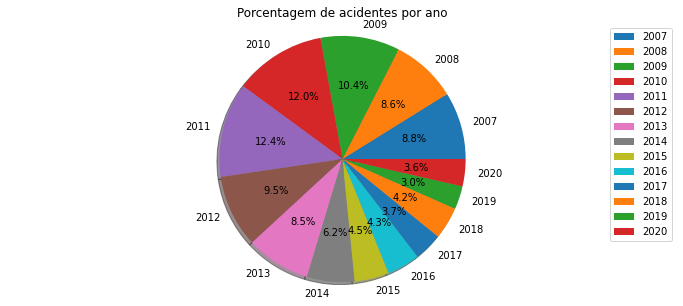

In [101]:
sizes = dups_ano.values.tolist()
labels = dups_ano.index.tolist()

fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=0)
ax1.axis('equal')  
plt.title('Porcentagem de acidentes por ano')
plt.legend()
plt.show()

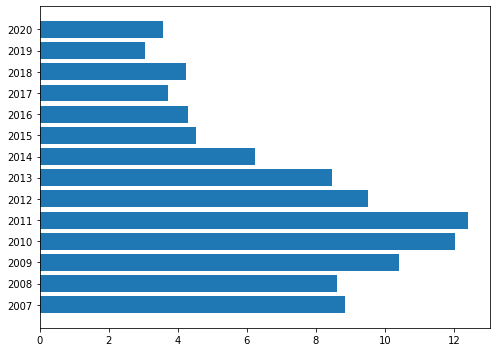

In [83]:
# this graph is unecessary
sizesToPercentage = []
for number in dups_ano.values.tolist():
    sizesToPercentage.append((number / total_num_acidentes) * 100)

sizes = dups_ano.values.tolist()
labels = dups_ano.index.tolist()

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.barh(labels,sizesToPercentage)

fig1.tight_layout()
plt.show()

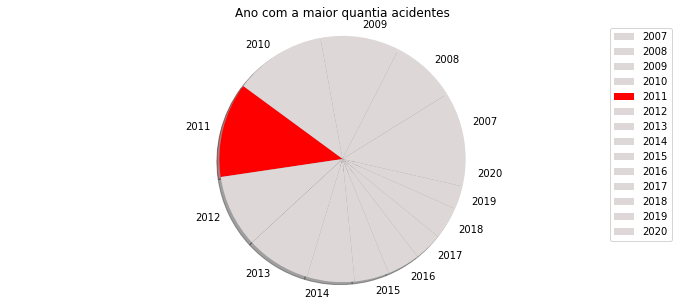

In [99]:
sizes = dups_ano.values.tolist()
labels = dups_ano.index.tolist()
colors = []

for x in range(len(sizes)):
  if (labels[x] == "2011"): # largest size
    colors.append('red')
  else:
    colors.append("#DDD7D7")


fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(sizes, labels=labels,shadow=True, startangle=0, colors=colors)
ax1.axis('equal')
plt.title('Ano com a maior quantia acidentes')
plt.legend()

plt.show()

### Gráfico: Maior razão acidente do maior ano com acidentes registrados

In [115]:
graph_one = df_acidente_ano.copy()

In [116]:
def doYearFiltering(value):
  internal_df = graph_one[graph_one.ano == value]
  internal_df = internal_df.pivot_table(index=['causa_acidente'], aggfunc='size')
  internal_dic = internal_df.to_dict()
  return internal_dic
  #print(internal_dic)

In [117]:
#causas_filtradas = dups_causa.to_dict()
#causas_filtradas = list(causas_filtradas.keys())
ano2011 = doYearFiltering('2011')

In [118]:
print(ano2011)

{'animais na pista': 3, 'defeito mecânico': 11, 'defeito na via': 2, 'desobediência': 4, 'dormindo': 6, 'falta de atenção': 46, 'ingestão de álcool': 11, 'não guardar distância de segurança': 21, 'outras': 30, 'ultrapassagem indevida': 9, 'velocidade incompatível': 24}


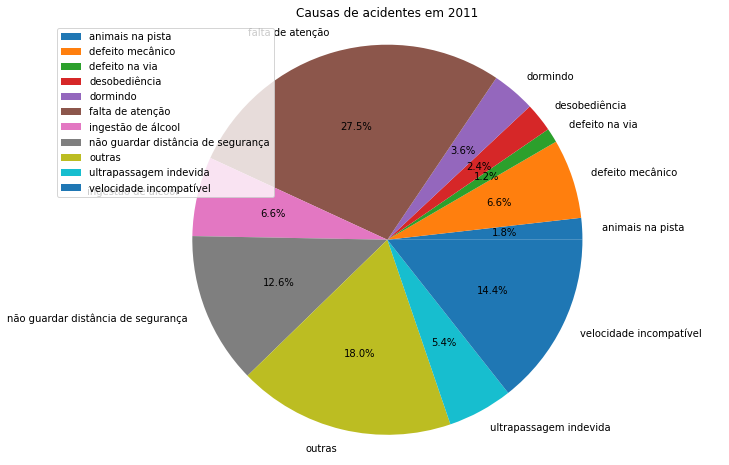

In [125]:

labels = []
sizes = []

for x, y in ano2011.items():
    labels.append(x)
    sizes.append(y)

fig1, ax1 = plt.subplots(figsize=(12,8))
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('Causas de acidentes em 2011')
plt.axis('equal')
plt.legend()
plt.show()

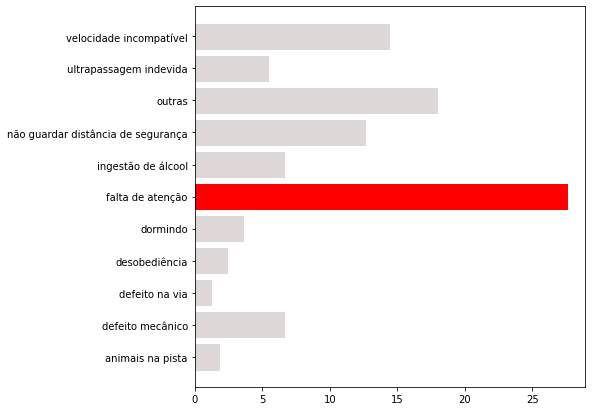

In [137]:
sizes,labels = [],[]

for x, y in ano2011.items():
    labels.append(x)
    sizes.append(y)    
colors = []
total = 0
for i in sizes:
  total+=i

sizes,labels = [],[] # reset to percent
for x, y in ano2011.items():
    labels.append(x)
    sizes.append((y/total) * 100)   

for x in range(len(sizes)):
  if (labels[x] == "falta de atenção"): # largest size
    colors.append('red')
  else:
    colors.append("#DDD7D7")

fig1, ax1 = plt.subplots(figsize=(7,7))
barlist = plt.barh(labels,sizes)

for i,bar in enumerate(barlist):
  barlist[i].set_color(colors[i])

plt.show()

### Gráfico: Evolução maior causa acidente do maior ano com o passar dos anos

In [138]:
def doYearsFiltering(value):
  internal_df = graph_one[graph_one.causa_acidente == value]
  internal_df = internal_df.pivot_table(index=['ano'], aggfunc='size')
  internal_dic = internal_df.to_dict()
  return internal_dic

In [142]:
falta_atencao = doYearsFiltering("falta de atenção")
dic_anos_total = dups_ano.to_dict()

print(falta_atencao)
print(dic_anos_total)

{'2007': 33, '2008': 38, '2009': 45, '2010': 43, '2011': 46, '2012': 46, '2013': 34, '2014': 14, '2015': 17, '2016': 15, '2017': 13, '2018': 20, '2019': 17, '2020': 16}
{'2007': 119, '2008': 116, '2009': 140, '2010': 162, '2011': 167, '2012': 128, '2013': 114, '2014': 84, '2015': 61, '2016': 58, '2017': 50, '2018': 57, '2019': 41, '2020': 48}


In [196]:
espacos,totais,sizes,labels = [],[],[],[]
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']

for x, y in dic_anos_total.items():
    totais.append(y)
    espacos.append(5)

for x, y in falta_atencao.items():
    labels.append(x)
    sizes.append(y)

for x in range(len(totais)):
  totais[x] = totais[x]-sizes[x]

#print(sizes)
#print(labels)
#print(totais)

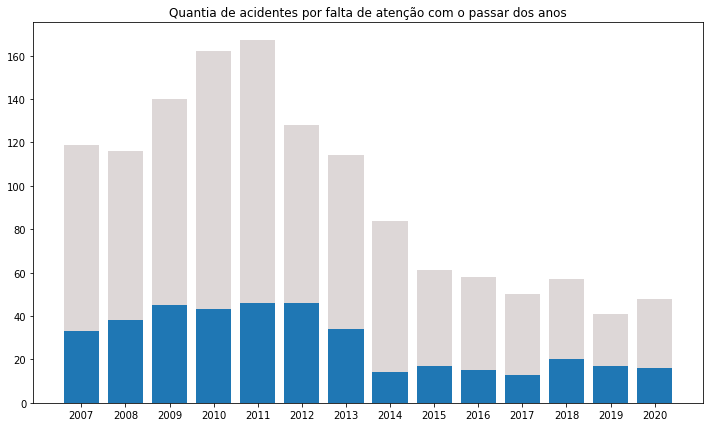

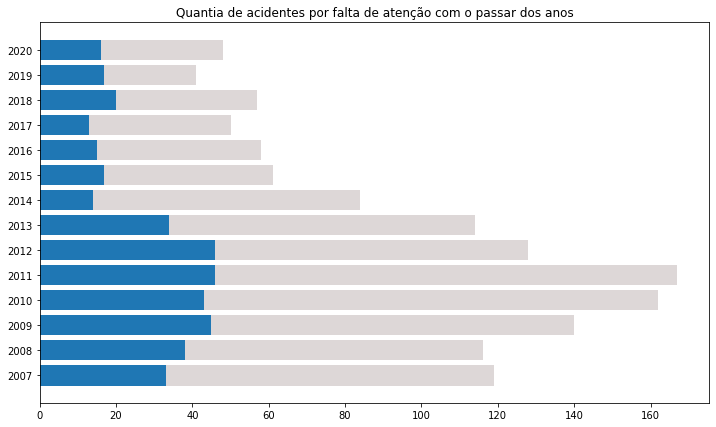

In [197]:

fig1, ax1 = plt.subplots(figsize=(12,7))
plt.title('Quantia de acidentes por falta de atenção com o passar dos anos')
plt.bar(labels, sizes)
plt.bar(labels, totais, bottom = sizes,color='#DDD7D7')
plt.show()

fig1, ax1 = plt.subplots(figsize=(12,7))
plt.title('Quantia de acidentes por falta de atenção com o passar dos anos')
plt.barh(labels, sizes)
plt.barh(labels, totais, left = sizes,color='#DDD7D7')
plt.show()

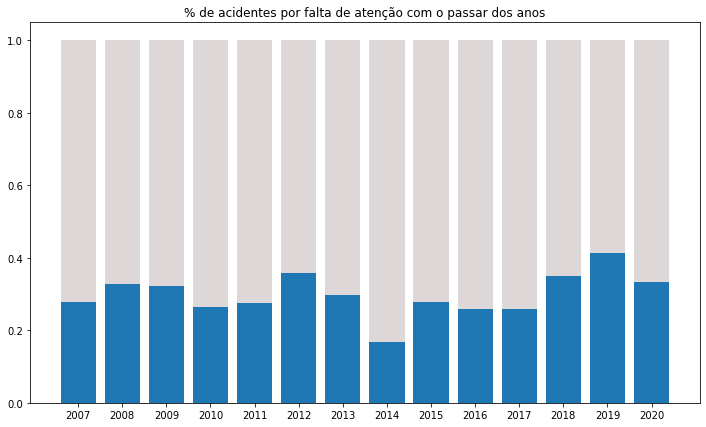

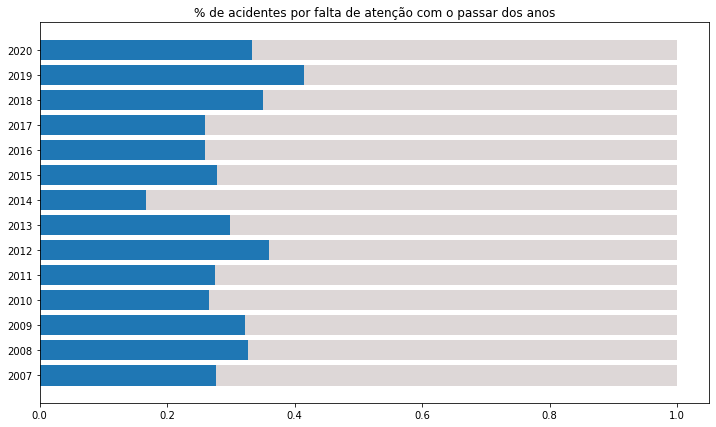

In [198]:
espacos,totais,sizes,labels = [],[],[],[]
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']

for x, y in dic_anos_total.items():
    totais.append(y)
    espacos.append(1)

for x, y in falta_atencao.items():
    labels.append(x)
    sizes.append(y)

for x in range(len(sizes)):
  sizes[x] = sizes[x]/totais[x]
  espacos[x] = espacos[x] - sizes[x]

fig1, ax1 = plt.subplots(figsize=(12,7))
plt.title('% de acidentes por falta de atenção com o passar dos anos')
plt.bar(labels, sizes)
plt.bar(labels, espacos, bottom = sizes,color='#DDD7D7')
plt.show()


fig1, ax1 = plt.subplots(figsize=(12,7))
plt.title('% de acidentes por falta de atenção com o passar dos anos')
plt.barh(labels, sizes)
plt.barh(labels, espacos, left = sizes,color='#DDD7D7')
plt.show()

